# Tokenizing the data of webpage to find most discussed topics and visualizing it

Team members:
    - Dinesh Chandra
    - Kiran
    - Chaitanya

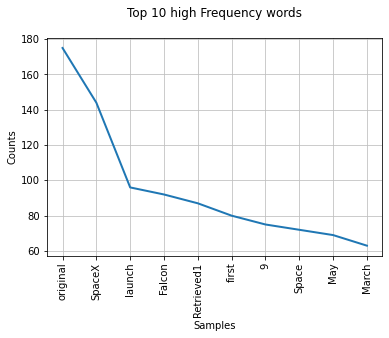

In [47]:
#importing the required libraries

import urllib.request as request
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Sending request to fetch data of weburl
response = request.urlopen('https://en.wikipedia.org/wiki/SpaceX')

# Reading the response
html = response.read()

# parsing the response to html
soup = BeautifulSoup(html,"html5lib")

# Fetching only the text 
text = soup.get_text(strip=True)

# tokenizing by word
tokens = [ t for t in text.split()]

# Cleaning the Data
# we have tokenized the data, but it contains general english words which are used for grammar to form structure sentence. 
# So, while analyzing the data we have to remove those. Those common words are fetched from "stopwords" package. 


### duplication of tokens data to clean_tokens variable.
clean_tokens = tokens[:]

### Remove the token if it is present in stopwords.
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
        

# Find the frequence of the words
freq = nltk.FreqDist(clean_tokens)


newDict_tokens = freq.copy()

# Deleting words which are repeated less than 5 times
for key,val in freq.items():
    if val < 5:
        newDict_tokens.pop(key)

# printing of the data

# for key,val in newDict_tokens.items():
#     print(str(key) + ":" + str(val))
    

    
# Data visualization using line graph
## showing top 10 high frequency word 
newDict_tokens.plot(10,cumulative=False,title="Top 10 high Frequency words\n")






## Representing data in form of bar chart and pie chart

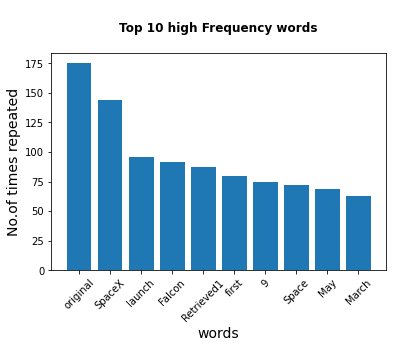

In [49]:
dict1 = dict(newDict_tokens)
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)
count =0
for t in sorted_keys:
    sorted_dict[t] = dict1[t]
    count+= 1
    if count == 10:
        break

keys = sorted_dict.keys()
values = sorted_dict.values()


plt.bar(keys,values)
plt.xticks(rotation = 45)
plt.title("\nTop 10 high Frequency words\n",fontweight='bold')
plt.xlabel("words",fontsize=14)
plt.ylabel("No.of times repeated",fontsize=14)

plt.show()

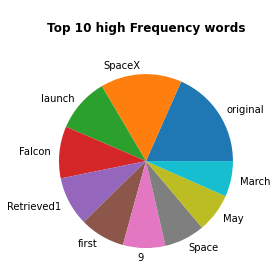

In [48]:
plt.pie(values,labels=keys)
plt.title("\nTop 10 high Frequency words\n",fontweight='bold')
plt.show()